# Introduction to Artificial Intelligence - Project 1
## Tommaso Mingrone

In [11]:
import util
import heapq
from typing import List, Tuple, Any
from game import Directions
from game import Agent
from game import Actions
import time
import search
import pacman

# Introduction

In this project, a number of search algorithms will be implemented, the purpose of which is to help the existing agent achieve its goals.
By exploiting these search algorithms, the efficiency and effectiveness of the implemented agent is improved. The integration of these strategies will enable the agent to navigate the environment, make decisions and ultimately achieve its goals with greater precision.


# Question 1 - Finding a Fixed Food Dot using Depth First Search

In this first part, we see how to implement the DFS algorithm in _search.py_. Depth-First search is a graph search algorithm used to systematically explore graphs. It works by choosing a path and follow it as far down as possible along each branch before returning, which makes it effective for tasks such as solving mazes, finding loops and analysing connectivity. DFS follows a Last-In-First-Out (LIFO) approach; in fact the stack structure was used in the following code.



In [12]:
def depthFirstSearch(problem):
    """
    Search the deepest nodes in the search tree first.

    Your search algorithm needs to return a list of actions that reaches the
    goal. Make sure to implement a graph search algorithm.
    """
    start_state = problem.getStartState()
    visited = set()

     # Initialize a stack for DFS
    stack = util.Stack()
    stack.push((start_state, []))

    while not stack.isEmpty():
        current_state, actions = stack.pop()

        if current_state in visited:
            continue

        visited.add(current_state)

        if problem.isGoalState(current_state):
            return actions

        successors = problem.getSuccessors(current_state)

        # Extends the stack with new elements corresponding to the successors of the current node that have not yet been visited
        for next_state, action, _ in successors:
            if next_state not in visited:
                stack.push((next_state, actions + [action]))

    return [] # If no solution is found, return an empty list


To answer the questions, it can be seen that with this implementation, Pacman carries out the expected order of exploration. It also follows all nodes explored by DFS until it reaches the target.  

![Screenshot 2023-11-10 alle 14.57.04.png](<attachment:Screenshot 2023-11-10 alle 14.57.04.png>)
![Screenshot 2023-11-10 alle 15.19.24.png](<attachment:Screenshot 2023-11-10 alle 15.19.24.png>)
![Screenshot 2023-11-10 alle 15.19.30.png](<attachment:Screenshot 2023-11-10 alle 15.19.30.png>)
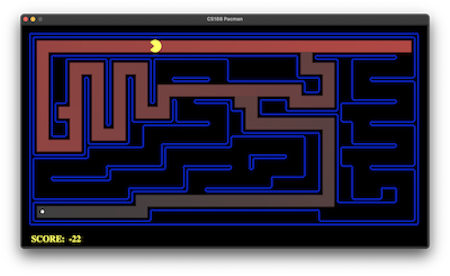
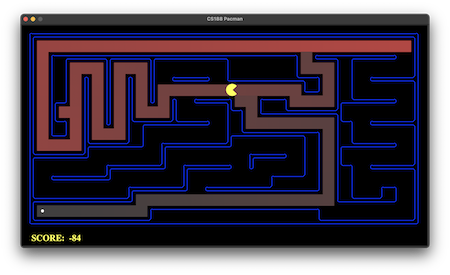
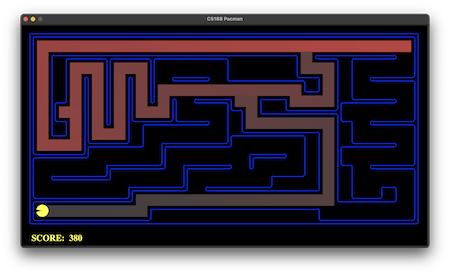

# Question 2 - Breadth First Search

Breadth-First Search (BFS) is a graph search algorithm that systematically explores nodes level by level. BFS is widely applied for tasks such as finding the shortest path. It prioritises breadth, using a First-In-First-Out (FIFO) approach, in particular in the following code we use the Queue structure. 

In [13]:
def breadthFirstSearch(problem):
    """
    Search the shallowest nodes in the search tree first.
    """
    start_state = problem.getStartState()
    if problem.isGoalState(start_state):
        return []  # The start state is the goal state

    # Initialize a queue for BFS
    queue = util.Queue()

    visited = set()  # Initialize a set to keep track of visited states

    queue.push((start_state, []))  # Enqueue the initial state with an empty action list

    while not queue.isEmpty():
        state, actions = queue.pop()

        if state in visited:
            continue  # Skip already visited states

        visited.add(state)

        if problem.isGoalState(state):
            return actions  # We found the goal

        for next_state, action, _ in problem.getSuccessors(state):
            new_actions = actions + [action]
            queue.push((next_state, new_actions))

    return []  # If no solution is found, return an empty list


![Screenshot 2023-11-17 alle 15.09.24.png](<attachment:Screenshot 2023-11-17 alle 15.09.24.png>)
![Screenshot 2023-11-17 alle 15.07.25.png](<attachment:Screenshot 2023-11-17 alle 15.07.25.png>)
![Screenshot 2023-11-17 alle 15.07.45.png](<attachment:Screenshot 2023-11-17 alle 15.07.45.png>)
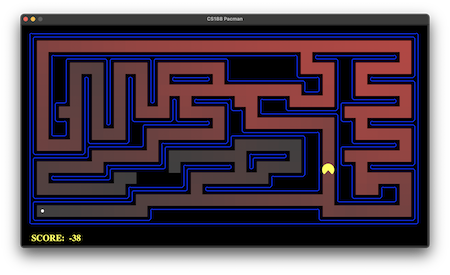
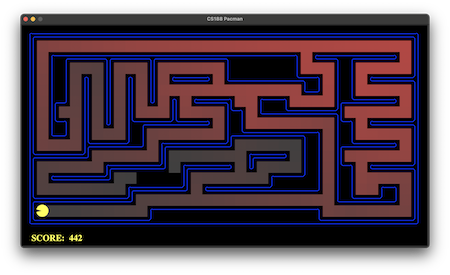
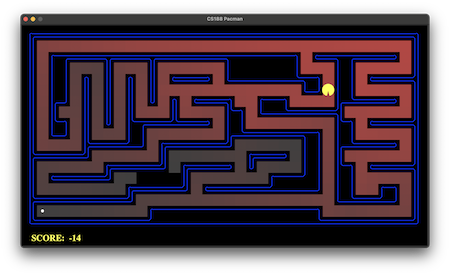

# Question 3 - Varying the Cost Function

Uniform Cost Search (UCS) is a graph search algorithm that prioritizes paths with the lowest cumulative cost. It is crucial for scenarios requiring optimal resource allocation and efficient path determination in weighted graphs. UCS uses a priority queue to systematically explore paths based on their cumulative costs.

In [14]:
def uniformCostSearch(problem):
    """Search the node of least total cost first."""
    visited = set()
    priority_queue = util.PriorityQueue()
    start_state = problem.getStartState()

    # Each element in the priority queue is a tuple: (state, path, cost)
    priority_queue.push((start_state, [], 0), 0)

    while not priority_queue.isEmpty():
        current_state, path, cost = priority_queue.pop()

        if problem.isGoalState(current_state):
            return path

        if current_state not in visited:
            visited.add(current_state)

            for successor, action, step_cost in problem.getSuccessors(current_state):
                new_path = path + [action]
                new_cost = cost + step_cost
                priority_queue.push((successor, new_path, new_cost), new_cost)

    return None  # Return None if no solution is found

To test the implementation, we can run some commands provided earlier.

![Screenshot 2023-11-10 alle 15.29.38.png](<attachment:Screenshot 2023-11-10 alle 15.29.38.png>)
![Screenshot 2023-11-10 alle 15.30.19.png](<attachment:Screenshot 2023-11-10 alle 15.30.19.png>)
![Screenshot 2023-11-10 alle 15.31.56.png](<attachment:Screenshot 2023-11-10 alle 15.31.56.png>)
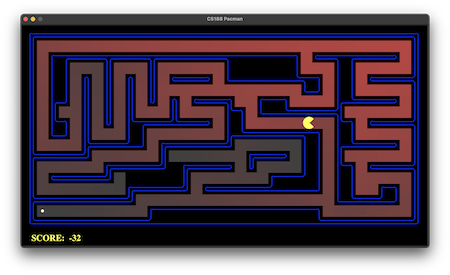
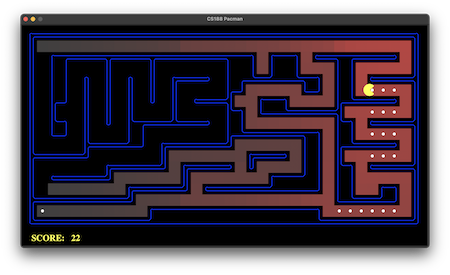
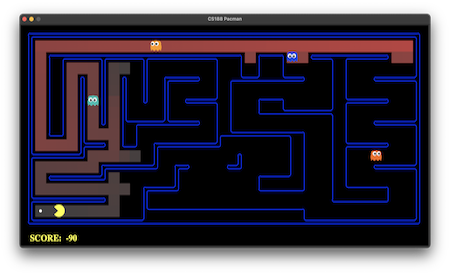

# Question 4 - A* search

A* is a heuristic search algorithm used for pathfinding and graph traversal. It combines the principles of Dijkstra's algorithm with an admissible heuristic to efficiently find the shortest path. A* evaluates nodes based on both the cost to reach them and an estimated cost to reach the goal, allowing for informed exploration. This algorithm is widely applied in robotics, game development, as in this case, and route planning, where finding the most efficient path is crucial. A* employs a priority queue to systematically explore nodes, balancing efficiency and optimality in pathfinding.

In [15]:
def nullHeuristic(state, problem=None):
    """
    A heuristic function estimates the cost from the current state to the nearest
    goal in the provided SearchProblem.  This heuristic is trivial.
    """
    return 0

def aStarSearch(problem, heuristic=nullHeuristic):
    """Search the node that has the lowest combined cost and heuristic first."""
    visited = set()
    priority_queue = util.PriorityQueue()
    start_state = problem.getStartState()

    # Each element in the priority queue is a tuple: (state, path, cost)
    priority_queue.push((start_state, [], 0), 0)

    while not priority_queue.isEmpty():
        current_state, path, cost = priority_queue.pop()

        if problem.isGoalState(current_state):
            return path

        if current_state not in visited:
            visited.add(current_state)

            for successor, action, step_cost in problem.getSuccessors(current_state):
                new_path = path + [action]
                new_cost = cost + step_cost
                heuristic_cost = new_cost + heuristic(successor, problem)

                priority_queue.push((successor, new_path, new_cost), heuristic_cost)

    return None  # Return None if no solution is found

![Screenshot 2023-11-17 alle 15.45.23.png](<attachment:Screenshot 2023-11-17 alle 15.45.23.png>)
![Screenshot 2023-11-17 alle 15.45.48.png](<attachment:Screenshot 2023-11-17 alle 15.45.48.png>)
![Screenshot 2023-11-17 alle 15.46.04.png](<attachment:Screenshot 2023-11-17 alle 15.46.04.png>)
![Screenshot 2023-11-17 alle 15.46.11.png](<attachment:Screenshot 2023-11-17 alle 15.46.11.png>)

The A* search algorithm finds the optimal solution somewhat faster than the uniform cost search. In fact, it expands less nodes than the UCS search algorithm.

## What happens on _openMaze_ for the various search strategies?

To see what happens we run this command _>python pacman.py -l openMaze -z .5 -p SearchAgent -a fn=[searchalgorithm]_ for each search algorithm.

### DFS

As far as DFS is concerned, we note that it follows the first available route to the target. This is effective because it reaches the goal, but it is not efficient because the path it follows is not the shortest and it takes a long time to get the goal.

![Screenshot 2023-11-11 alle 10.57.23.png](<attachment:Screenshot 2023-11-11 alle 10.57.23.png>)
![Screenshot 2023-11-11 alle 10.57.45.png](<attachment:Screenshot 2023-11-11 alle 10.57.45.png>)
![Screenshot 2023-11-11 alle 10.58.09.png](<attachment:Screenshot 2023-11-11 alle 10.58.09.png>)
![Screenshot 2023-11-11 alle 11.03.52.png](<attachment:Screenshot 2023-11-11 alle 11.03.52.png>)

### BFS and UCS

The BFS and UCS algorithms follow the same path, which is efficient because it achieves the goal in a few moves and in a short time.

![Screenshot 2023-11-17 alle 16.13.50.png](<attachment:Screenshot 2023-11-17 alle 16.13.50.png>)
![Screenshot 2023-11-17 alle 16.13.59.png](<attachment:Screenshot 2023-11-17 alle 16.13.59.png>)
![Screenshot 2023-11-17 alle 16.14.05.png](<attachment:Screenshot 2023-11-17 alle 16.14.05.png>)
![Screenshot 2023-11-17 alle 16.14.21.png](<attachment:Screenshot 2023-11-17 alle 16.14.21.png>)

### A*

The A* algorithm follows the same path as BFS and UCS, but is more efficient because it expands less node.

![Screenshot 2023-11-17 alle 16.19.21.png](<attachment:Screenshot 2023-11-17 alle 16.19.21.png>)
![Screenshot 2023-11-17 alle 16.20.20.png](<attachment:Screenshot 2023-11-17 alle 16.20.20.png>)
![Screenshot 2023-11-17 alle 16.19.35.png](<attachment:Screenshot 2023-11-17 alle 16.19.35.png>)
![Screenshot 2023-11-17 alle 16.19.52.png](<attachment:Screenshot 2023-11-17 alle 16.19.52.png>)

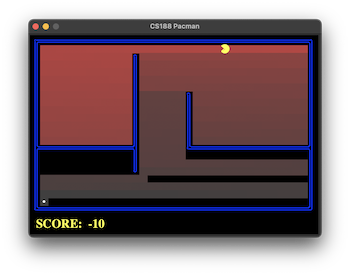
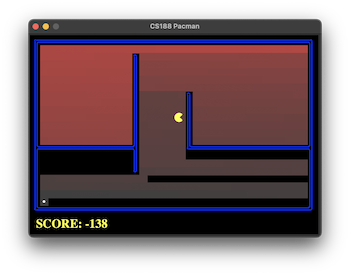
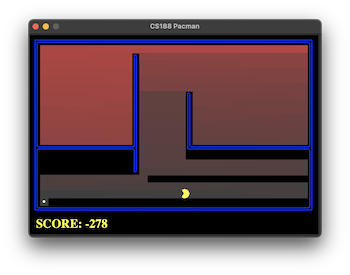
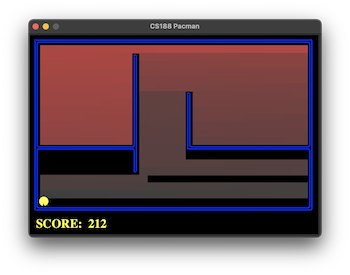
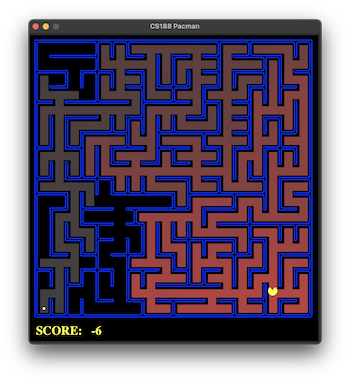
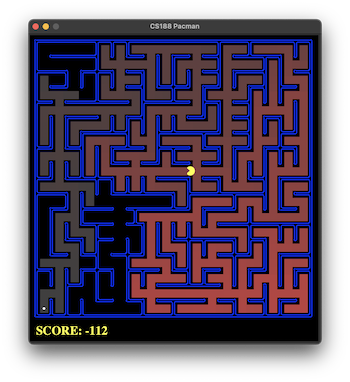
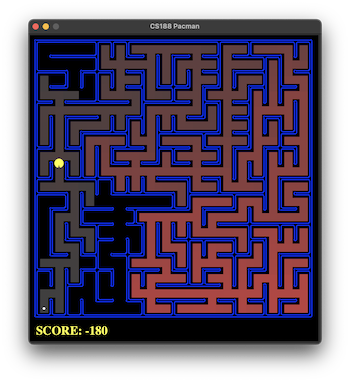
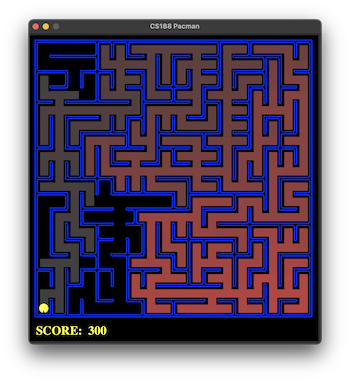
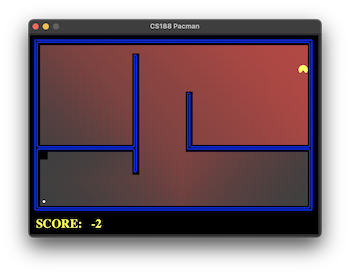
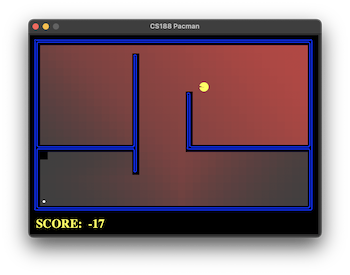
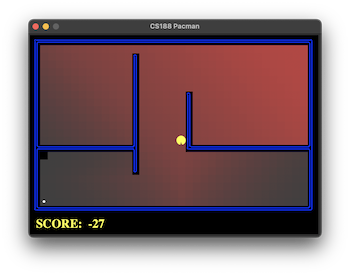
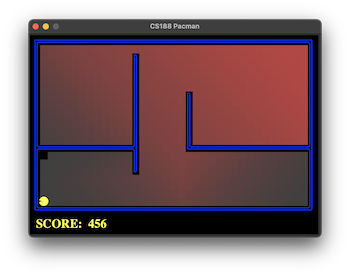
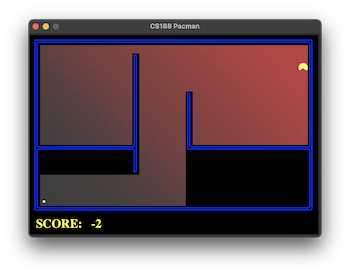
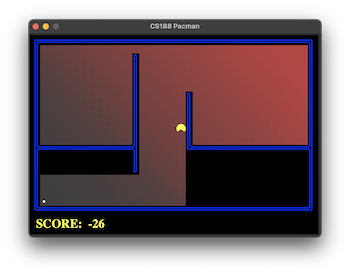
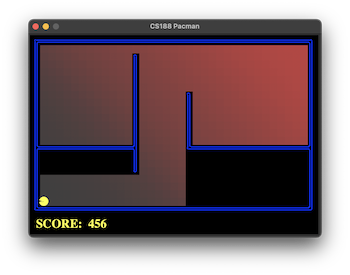
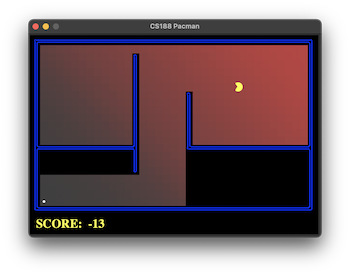

# Question 5 - Finding All the Corners

In this section we implement some functions of the _class CornersProblem(search.SearchProblem)_. The request to be fulfilled is to make pacman eat the four food points located in the four corners of the maze.

In [16]:
class CornersProblem(search.SearchProblem):
    """
    This search problem finds paths through all four corners of a layout.

    You must select a suitable state space and successor function
    """

    def __init__(self, startingGameState: pacman.GameState):
        """
        Stores the walls, pacman's starting position, and corners.
        """
        self.walls = startingGameState.getWalls()
        self.startingPosition = startingGameState.getPacmanPosition()
        top, right = self.walls.height - 2, self.walls.width - 2
        self.corners = ((1, 1), (1, top), (right, 1), (right, top))
        for corner in self.corners:
            if not startingGameState.hasFood(*corner):
                print('Warning: no food in corner ' + str(corner))
        self._expanded = 0  # DO NOT CHANGE; Number of search nodes expanded

    def getStartState(self):
        """
        Returns the start state (in your state space, not the full Pacman state space)
        """
        return (self.startingPosition, tuple([]))

    def isGoalState(self, state: Any):
        """
        Returns whether this search state is a goal state of the problem.
        """
        node = state[0]
        visitedCorners = state[1]

        if node in self.corners:
            if not node in visitedCorners:
                visitedCorners.append(node)
            return len(visitedCorners) == 4
        else:
            return False

    def getSuccessors(self, state: Any):
        """
        Returns successor states, the actions they require, and a cost of 1.

         As noted in search.py:
            For a given state, this should return a list of triples, (successor,
            action, stepCost), where 'successor' is a successor to the current
            state, 'action' is the action required to get there, and 'stepCost'
            is the incremental cost of expanding to that successor
        """
        x,y = state[0]
        visitedCorners = state[1]
        successors = []
        for action in [Directions.NORTH, Directions.SOUTH, Directions.EAST, Directions.WEST]:
            # Add a successor state to the successor list if the action is legal
            # Here's a code snippet for figuring out whether a new position hits a wall:
            #   x,y = currentPosition
            #   dx, dy = Actions.directionToVector(action)
            #   nextx, nexty = int(x + dx), int(y + dy)
            #   hitsWall = self.walls[nextx][nexty]

            dx,dy = Actions.directionToVector(action)
            nextx, nexty = int(x + dx), int(y + dy)
            hintsWall = self.walls[nextx][nexty]

            if not hintsWall:
                successorsVisitedCorners = list(visitedCorners)
                nextNode = (nextx,nexty)

                if nextNode in self.corners:
                    if nextNode not in successorsVisitedCorners:
                        successorsVisitedCorners.append(nextNode)
                
                successor = ((nextNode, tuple(successorsVisitedCorners)), action, 1)
                successors.append(successor)

        self._expanded += 1 # DO NOT CHANGE
        return successors


    def getCostOfActions(self, actions):
        """
        Returns the cost of a particular sequence of actions.  If those actions
        include an illegal move, return 999999.  This is implemented for you.
        """
        if actions == None: return 999999
        x,y= self.startingPosition
        for action in actions:
            dx, dy = Actions.directionToVector(action)
            x, y = int(x + dx), int(y + dy)
            if self.walls[x][y]: return 999999
        return len(actions)

### tinyMaze

![Screenshot 2023-11-11 alle 21.14.55.png](<attachment:Screenshot 2023-11-11 alle 21.14.55.png>)
![Screenshot 2023-11-11 alle 21.15.29.png](<attachment:Screenshot 2023-11-11 alle 21.15.29.png>)
![Screenshot 2023-11-11 alle 21.15.38.png](<attachment:Screenshot 2023-11-11 alle 21.15.38.png>)
![Screenshot 2023-11-11 alle 21.16.08.png](<attachment:Screenshot 2023-11-11 alle 21.16.08.png>)

### mediumMaze

![Screenshot 2023-11-13 alle 11.09.05.png](<attachment:Screenshot 2023-11-13 alle 11.09.05.png>)
![Screenshot 2023-11-13 alle 11.09.07.png](<attachment:Screenshot 2023-11-13 alle 11.09.07.png>)
![Screenshot 2023-11-13 alle 11.09.15.png](<attachment:Screenshot 2023-11-13 alle 11.09.15.png>)
![Screenshot 2023-11-13 alle 11.09.18.png](<attachment:Screenshot 2023-11-13 alle 11.09.18.png>)
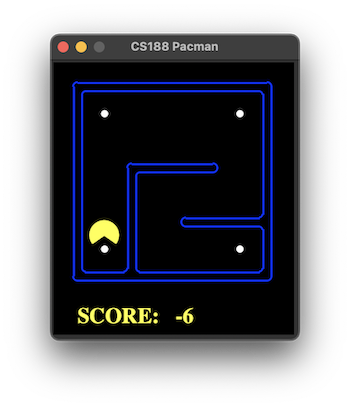
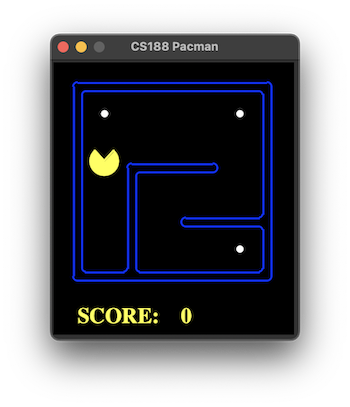
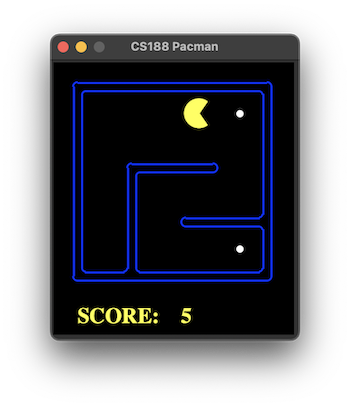
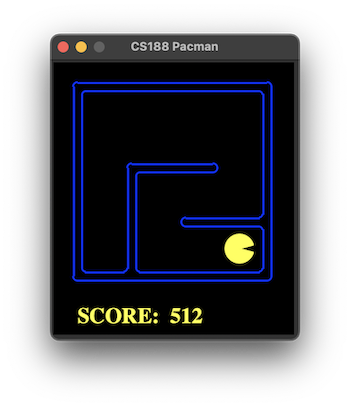
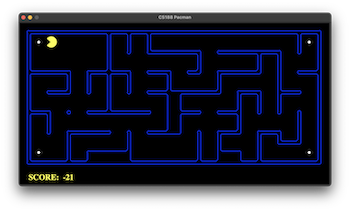
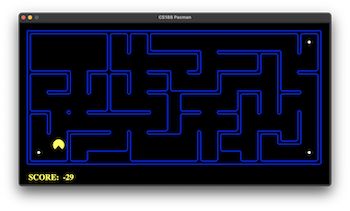
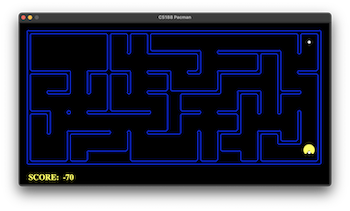
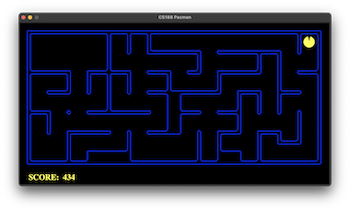

# Question 6 - Corners Problem: Heuristic

We need to implement consistent, non-trivial heuristics for the Corners Problem.  
The heuristic must be admissible (returns lower bound on the actual cost of the shortest path) and consistent (if an action has a cost *c*, performing that action can only cause the heuristic to be reduced by at most *c*). The heuristic must reduce the total calculation time and it must be ensured that it returns 0 in each target state and never returns a negative value. 



In [17]:
def cornersHeuristic(state: Any, problem: CornersProblem):
    """
    A heuristic for the CornersProblem that you defined.

      state:   The current search state
               (a data structure you chose in your search problem)

      problem: The CornersProblem instance for this layout.

    This function should always return a number that is a lower bound on the
    shortest path from the state to a goal of the problem; i.e.  it should be
    admissible (as well as consistent).
    """
    corners = problem.corners # These are the corner coordinates
    walls = problem.walls # These are the walls of the maze, as a Grid (game.py)

    visitedCorners = state[1]
    cornersLeftToVisit = []

    for corner in corners:

        if corner not in visitedCorners:
            cornersLeftToVisit.append(corner)

    totalCost = 0
    toDo = state[0]
    currentPoint = toDo
    while cornersLeftToVisit:
        heuristic_cost, corner = min([(util.manhattanDistance (currentPoint, corner), corner) for corner in cornersLeftToVisit])
        cornersLeftToVisit.remove(corner)
        currentPoint = corner
        totalCost += heuristic_cost
    return totalCost

# Question 7 - Eating All The Dots 

To answer question 7 we will solve this search problem: eating all the food dots in as few steps as possible.  
To do this, we need to implement the following function defined as _def foodHeuristic(state: Tuple[Tuple, List[List]], problem: FoodSearchProblem)_. We also implement _def isGoalState(self, state: Tuple[int, int])_ to define the goal of this problem.

In [18]:
class FoodSearchProblem:
    """
    A search problem associated with finding the a path that collects all of the
    food (dots) in a Pacman game.

    A search state in this problem is a tuple ( pacmanPosition, foodGrid ) where
      pacmanPosition: a tuple (x,y) of integers specifying Pacman's position
      foodGrid:       a Grid (see game.py) of either True or False, specifying remaining food
    """
    def __init__(self, startingGameState: pacman.GameState):
        self.start = (startingGameState.getPacmanPosition(), startingGameState.getFood())
        self.walls = startingGameState.getWalls()
        self.startingGameState = startingGameState
        self._expanded = 0 # DO NOT CHANGE
        self.heuristicInfo = {} # A dictionary for the heuristic to store information

    def getStartState(self):
        return self.start

    def isGoalState(self, state):
        return state[1].count() == 0

    def getSuccessors(self, state):
        "Returns successor states, the actions they require, and a cost of 1."
        successors = []
        self._expanded += 1 # DO NOT CHANGE
        for direction in [Directions.NORTH, Directions.SOUTH, Directions.EAST, Directions.WEST]:
            x,y = state[0]
            dx, dy = Actions.directionToVector(direction)
            nextx, nexty = int(x + dx), int(y + dy)
            if not self.walls[nextx][nexty]:
                nextFood = state[1].copy()
                nextFood[nextx][nexty] = False
                successors.append( ( ((nextx, nexty), nextFood), direction, 1) )
        return successors

    def getCostOfActions(self, actions):
        """Returns the cost of a particular sequence of actions.  If those actions
        include an illegal move, return 999999"""
        x,y= self.getStartState()[0]
        cost = 0
        for action in actions:
            # figure out the next state and see whether it's legal
            dx, dy = Actions.directionToVector(action)
            x, y = int(x + dx), int(y + dy)
            if self.walls[x][y]:
                return 999999
            cost += 1
        return cost
class PositionSearchProblem(search.SearchProblem):
    """
    A search problem defines the state space, start state, goal test, successor
    function and cost function.  This search problem can be used to find paths
    to a particular point on the pacman board.

    The state space consists of (x,y) positions in a pacman game.

    Note: this search problem is fully specified; you should NOT change it.
    """

    def __init__(self, gameState, costFn = lambda x: 1, goal=(1,1), start=None, warn=True, visualize=True):
        """
        Stores the start and goal.

        gameState: A GameState object (pacman.py)
        costFn: A function from a search state (tuple) to a non-negative number
        goal: A position in the gameState
        """
        self.walls = gameState.getWalls()
        self.startState = gameState.getPacmanPosition()
        if start != None: self.startState = start
        self.goal = goal
        self.costFn = costFn
        self.visualize = visualize
        if warn and (gameState.getNumFood() != 1 or not gameState.hasFood(*goal)):
            print('Warning: this does not look like a regular search maze')

        # For display purposes
        self._visited, self._visitedlist, self._expanded = {}, [], 0 # DO NOT CHANGE

    def getStartState(self):
        return self.startState

    def isGoalState(self, state):
        isGoal = state == self.goal

        # For display purposes only
        if isGoal and self.visualize:
            self._visitedlist.append(state)
            import __main__
            if '_display' in dir(__main__):
                if 'drawExpandedCells' in dir(__main__._display): #@UndefinedVariable
                    __main__._display.drawExpandedCells(self._visitedlist) #@UndefinedVariable

        return isGoal

    def getSuccessors(self, state):
        """
        Returns successor states, the actions they require, and a cost of 1.

         As noted in search.py:
             For a given state, this should return a list of triples,
         (successor, action, stepCost), where 'successor' is a
         successor to the current state, 'action' is the action
         required to get there, and 'stepCost' is the incremental
         cost of expanding to that successor
        """

        successors = []
        for action in [Directions.NORTH, Directions.SOUTH, Directions.EAST, Directions.WEST]:
            x,y = state
            dx, dy = Actions.directionToVector(action)
            nextx, nexty = int(x + dx), int(y + dy)
            if not self.walls[nextx][nexty]:
                nextState = (nextx, nexty)
                cost = self.costFn(nextState)
                successors.append( ( nextState, action, cost) )

        # Bookkeeping for display purposes
        self._expanded += 1 # DO NOT CHANGE
        if state not in self._visited:
            self._visited[state] = True
            self._visitedlist.append(state)

        return successors

    def getCostOfActions(self, actions):
        """
        Returns the cost of a particular sequence of actions. If those actions
        include an illegal move, return 999999.
        """
        if actions == None: return 999999
        x,y= self.getStartState()
        cost = 0
        for action in actions:
            # Check figure out the next state and see whether its' legal
            dx, dy = Actions.directionToVector(action)
            x, y = int(x + dx), int(y + dy)
            if self.walls[x][y]: return 999999
            cost += self.costFn((x,y))
        return cost
class AnyFoodSearchProblem(PositionSearchProblem):
    """
    A search problem for finding a path to any food.

    This search problem is just like the PositionSearchProblem, but has a
    different goal test, which you need to fill in below.  The state space and
    successor function do not need to be changed.

    The class definition above, AnyFoodSearchProblem(PositionSearchProblem),
    inherits the methods of the PositionSearchProblem.

    You can use this search problem to help you fill in the findPathToClosestDot
    method.
    """

    def __init__(self, gameState):
        "Stores information from the gameState.  You don't need to change this."
        # Store the food for later reference
        self.food = gameState.getFood()

        # Store info for the PositionSearchProblem (no need to change this)
        self.walls = gameState.getWalls()
        self.startState = gameState.getPacmanPosition()
        self.costFn = lambda x: 1
        self._visited, self._visitedlist, self._expanded = {}, [], 0 # DO NOT CHANGE

    def isGoalState(self, state: Tuple[int, int]):
        """
        The state is Pacman's position. Fill this in with a goal test that will
        complete the problem definition.
        """
        x,y = state

        distance, goal = min([(util.manhattanDistance (state, goal), goal) for goal in self.food.asList()])
        if state == goal: 
            return True
        else:
            return False
        
def foodHeuristic(state: Tuple[Tuple, List[List]], problem: FoodSearchProblem):
    """
    Your heuristic for the FoodSearchProblem goes here.

    This heuristic must be consistent to ensure correctness.  First, try to come
    up with an admissible heuristic; almost all admissible heuristics will be
    consistent as well.

    If using A* ever finds a solution that is worse uniform cost search finds,
    your heuristic is *not* consistent, and probably not admissible!  On the
    other hand, inadmissible or inconsistent heuristics may find optimal
    solutions, so be careful.

    The state is a tuple (pacmanPosition, foodGrid) where foodGrid is a Grid
    (see game.py) of either True or False. You can call foodGrid.asList() to get
    a list of food coordinates instead.

    If you want access to info like walls, capsules, etc., you can query the
    problem.  For example, problem.walls gives you a Grid of where the walls
    are.

    If you want to *store* information to be reused in other calls to the
    heuristic, there is a dictionary called problem.heuristicInfo that you can
    use. For example, if you only want to count the walls once and store that
    value, try: problem.heuristicInfo['wallCount'] = problem.walls.count()
    Subsequent calls to this heuristic can access
    problem.heuristicInfo['wallCount']
    """
    position, foodGrid = state

    listFood = foodGrid.asList()

    if len(listFood) == 0:
        return 0

    # Use the maze distance to the max distance food pellet
    max_distance = max([mazeDistance(position, food, problem.startingGameState) for food in listFood])

    return max_distance

def mazeDistance(point1: Tuple[int, int], point2: Tuple[int, int], gameState: pacman.GameState) -> int:
    """
    Returns the maze distance between any two points, using the search functions
    you have already built. The gameState can be any game state -- Pacman's
    position in that state is ignored.

    Example usage: mazeDistance( (2,4), (5,6), gameState)

    This might be a useful helper function for your ApproximateSearchAgent.
    """
    x1, y1 = point1
    x2, y2 = point2
    walls = gameState.getWalls()
    assert not walls[x1][y1], 'point1 is a wall: ' + str(point1)
    assert not walls[x2][y2], 'point2 is a wall: ' + str(point2)
    prob = PositionSearchProblem(gameState, start=point1, goal=point2, warn=False, visualize=False)
    return len(search.bfs(prob))

To see what happens we run this command _>python pacman.py -l testSearch -p AStarFoodSearchAgent_ for each search algorithm.

![Screenshot 2023-11-14 alle 11.48.33.png](<attachment:Screenshot 2023-11-14 alle 11.48.33.png>)
![Screenshot 2023-11-14 alle 11.46.20.png](<attachment:Screenshot 2023-11-14 alle 11.46.20.png>)

To see what happens we run this command _>python pacman.py -l trickySearch -p AStarFoodSearchAgent_ for each search algorithm.

![Screenshot 2023-11-17 alle 16.00.17.png](<attachment:Screenshot 2023-11-17 alle 16.00.17.png>)
![Screenshot 2023-11-17 alle 16.00.38.png](<attachment:Screenshot 2023-11-17 alle 16.00.38.png>)
![Screenshot 2023-11-17 alle 16.00.43.png](<attachment:Screenshot 2023-11-17 alle 16.00.43.png>)
![Screenshot 2023-11-17 alle 16.01.34.png](<attachment:Screenshot 2023-11-17 alle 16.01.34.png>)
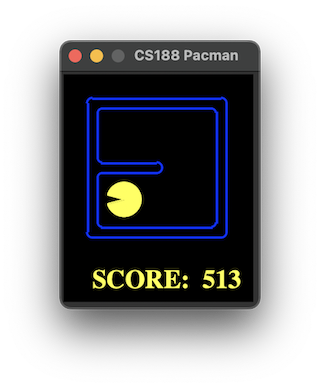
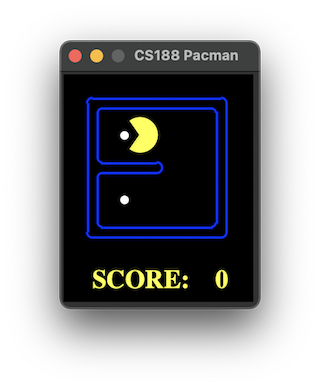
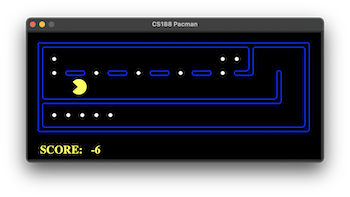
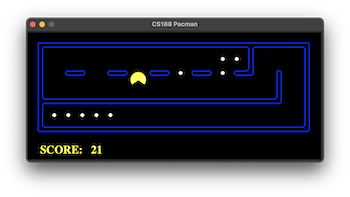
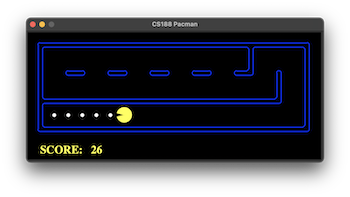
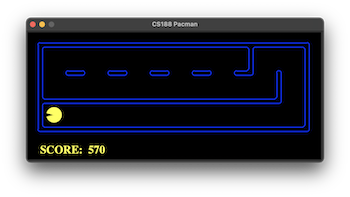

# Question 8 - Suboptimal Search

In this case we have a maze completely covered with food dots and we implement the function _def findPathToClosestDot(self, gameState: pacman.GameState)_ to make our agent follow a reasonable path to eat ALL food dots.

In [ ]:
def findPathToClosestDot(self, gameState: pacman.GameState):
    """
    Returns a path (a list of actions) to the closest dot, starting from
    gameState.
    """
    # Here are some useful elements of the startState
    startPosition = gameState.getPacmanPosition()
    food = gameState.getFood()
    walls = gameState.getWalls()
    problem = AnyFoodSearchProblem(gameState)

    return search.astar(problem)

![Screenshot 2023-11-14 alle 11.59.49.png](<attachment:Screenshot 2023-11-14 alle 11.59.49.png>)
![Screenshot 2023-11-14 alle 12.00.34.png](<attachment:Screenshot 2023-11-14 alle 12.00.34.png>)
![Screenshot 2023-11-14 alle 12.01.44.png](<attachment:Screenshot 2023-11-14 alle 12.01.44.png>)
![Screenshot 2023-11-14 alle 13.59.05.png](<attachment:Screenshot 2023-11-14 alle 13.59.05.png>)
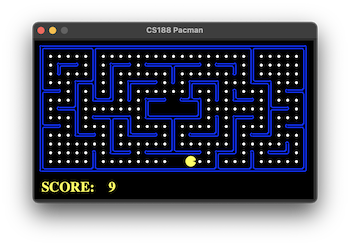
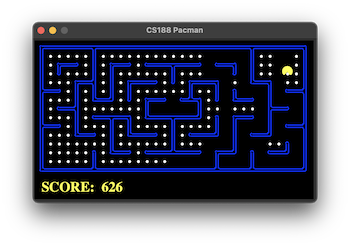
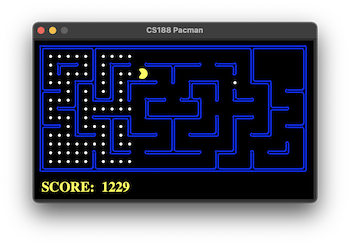
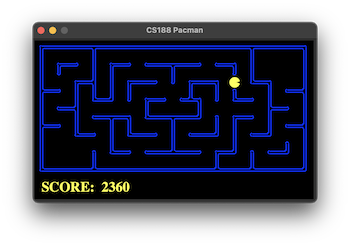

### Why repeatedly going to the nearest point does not always lead to finding the shortest path to all points.

The ClosestDotSearchAgent may not always find the shortest possible path through the maze because it uses a greedy strategy: at each step, it chooses the closest dot and moves toward it. While this strategy works well in many cases, it does not guarantee optimality in terms of finding the shortest path overall.

Here's a example to illustrate the limitation:

Consider a maze with three dots arranged in a straight line, and the agent starts at one end of the line. The dots are labeled A, B, and C, and the agent starts at position S.
If the agent follows the closest-dot strategy, it will first go to A, then to B, and finally to C. The path would be S -> A -> B -> C.

However, the optimal path to eat all dots in the shortest possible way would be to go directly from S to C. The optimal path would be S -> C.

So, in this example, the closest-dot strategy did not result in the shortest path to eat all the dots. This situation can occur in more complex mazes as well, where the closest dot at each step may not lead to the overall shortest path.

In general, a strategy that only considers the local immediate benefit (like going to the closest dot) might not always yield the globally optimal solution. To find the shortest path, we might need to consider more advanced search algorithms, such as A* search, which takes into account both the cost to reach the current state and a heuristic that estimates the cost to reach the goal.